In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv('weather.csv')

print(df.head())
print(df.info())
print(df.describe())

print("\nMissing values:\n", df.isnull().sum())
df = df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall'])

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

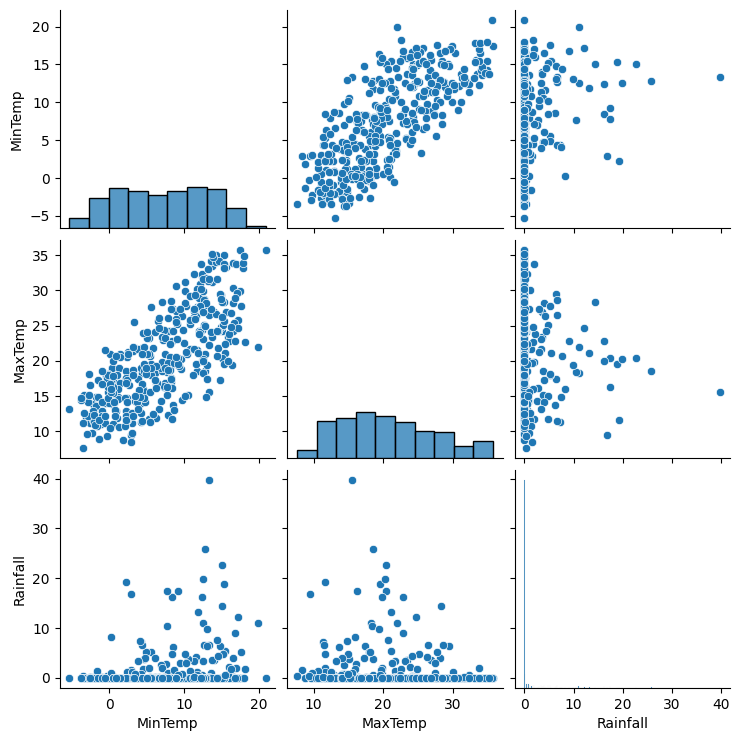

In [15]:
# Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

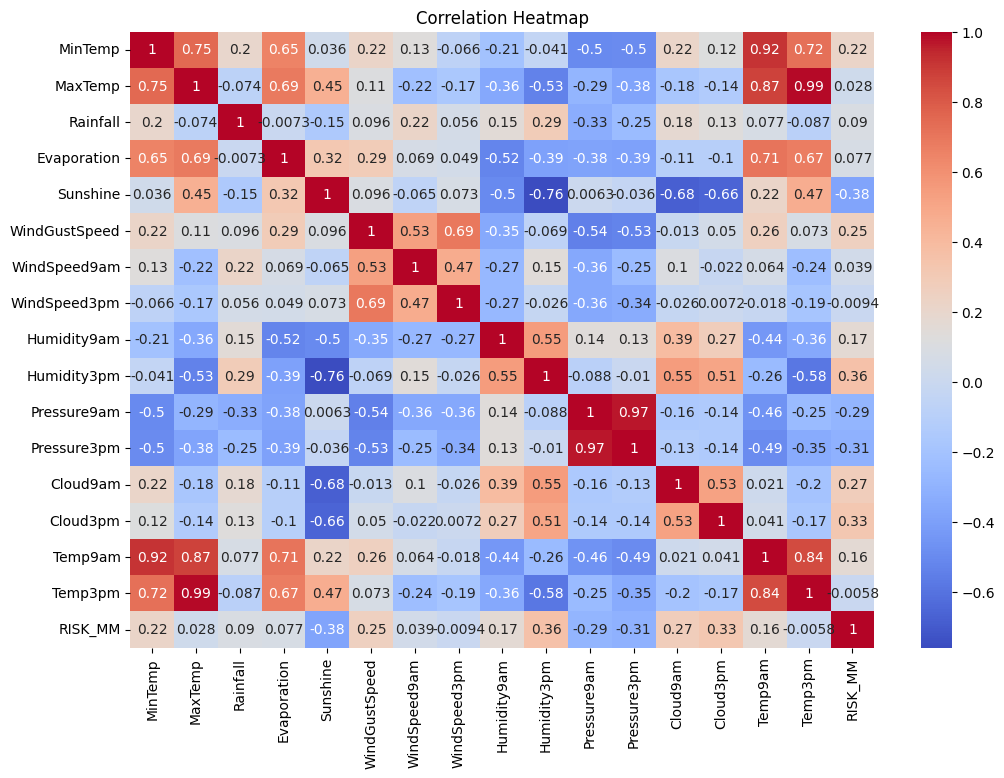

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#data analysis
print("Mean Max Temperature:", df['MaxTemp'].mean())
print("Mean Rainfall:", df['Rainfall'].mean())

Mean Max Temperature: 20.550273224043714
Mean Rainfall: 1.428415300546448


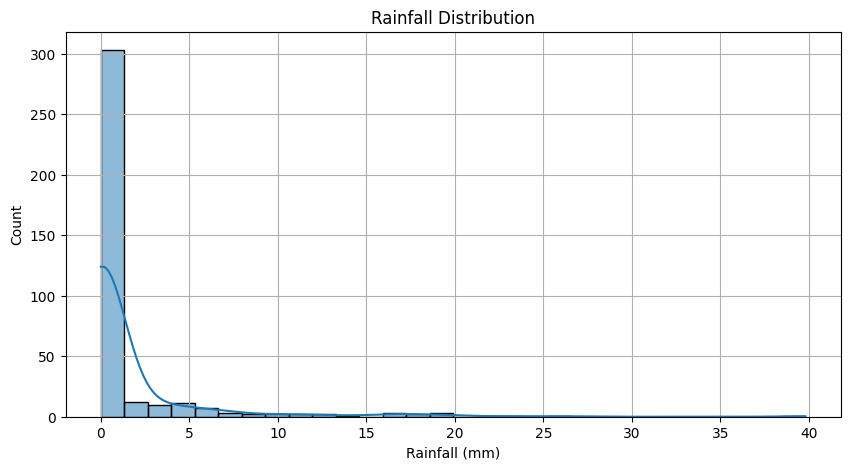

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'], bins=30, kde=True)
plt.xlabel('Rainfall (mm)')
plt.title('Rainfall Distribution')
plt.grid(True)
plt.show()


In [19]:
#advanced analysis
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse:.2f}')


Mean Squared Error for Rainfall Prediction: 37.08


In [21]:
# conclusion
print("Linear regression using MinTemp and MaxTemp gives a rough estimate of Rainfall.")
print("Further improvement may require more features like Humidity, WindSpeed, etc.")

Linear regression using MinTemp and MaxTemp gives a rough estimate of Rainfall.
Further improvement may require more features like Humidity, WindSpeed, etc.
